In [7]:
ls ../..

proj/


# Transmission system - SiPLAB/TEKEVER Campaign

This notebook is a dashboard for visualisation of experimental data obtained during the campaign performed in collaboration between SiPLAB and TEKEVER on 09/05/2019.
This dashboard provides interactive tools that allow users to visualise the following signals in both time domain and frequency domain:

- Transmitted signals
- Received signals on channel 1
- Received signals on channel 2

Refer to section INPUTS in order to choose the desired signal.

# INPUTS

In [1]:
day = 'day2'
exp = '202'
# signal_name_pattern = 'chirp*'
# signal_name_pattern = '*double_chirp*'
signal_name_pattern = '*f080000*'

## Transmitted signals

In [2]:
!echo 'measurements/day2/signals'

measurements/day2/signals


In [3]:
from IPython.core.display import display, HTML

a = !ls measurements/day2/signals
lis = ''
for li in a:
#     print(li)
    lis += '<li>{}</li>'.format(li)

display(HTML('<ul>{}</ul>'.format(lis)))

## Visualiser

### Source

<IPython.core.display.Javascript object>


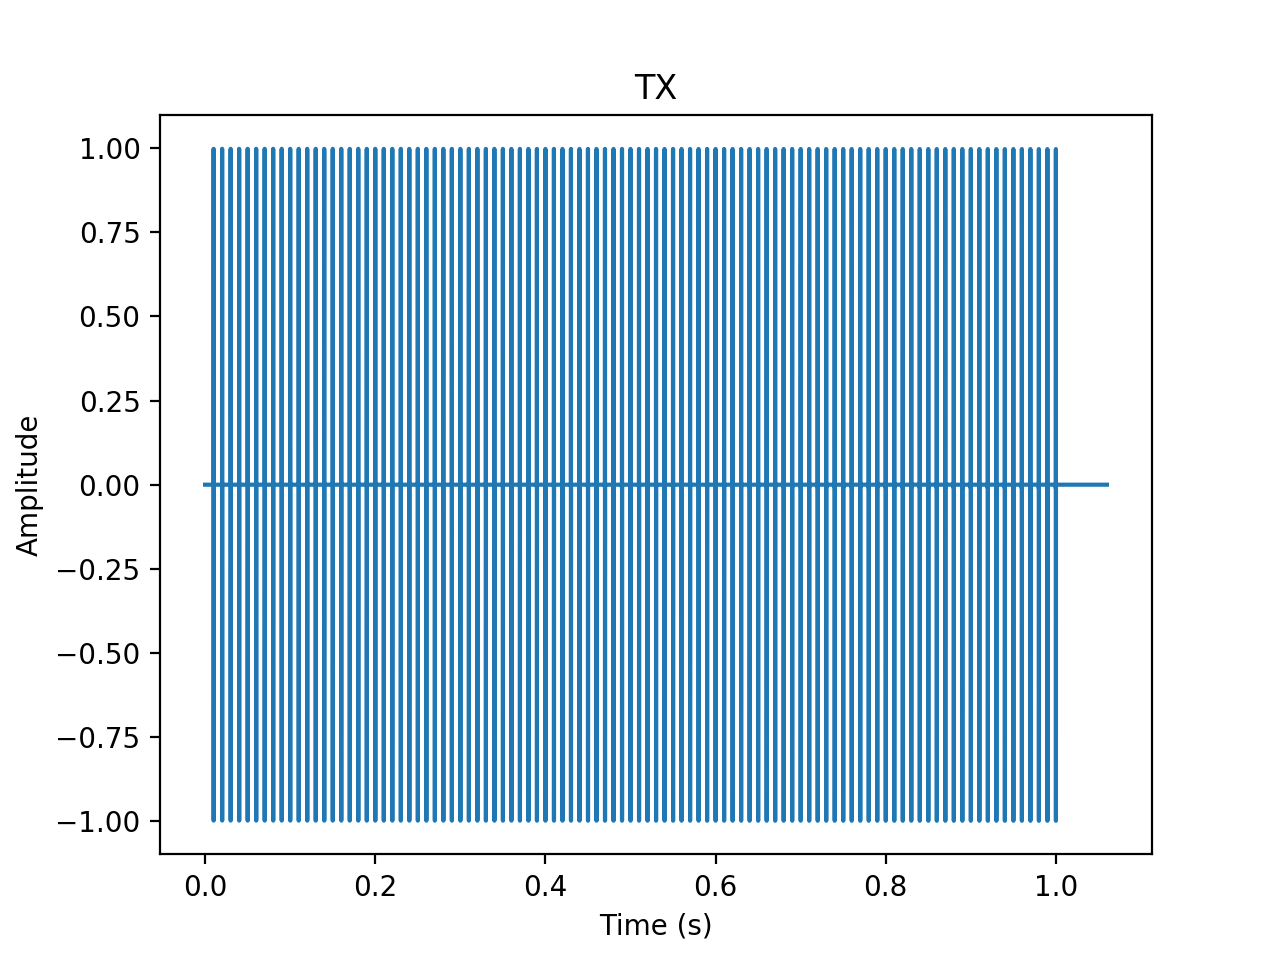

<IPython.core.display.Javascript object>


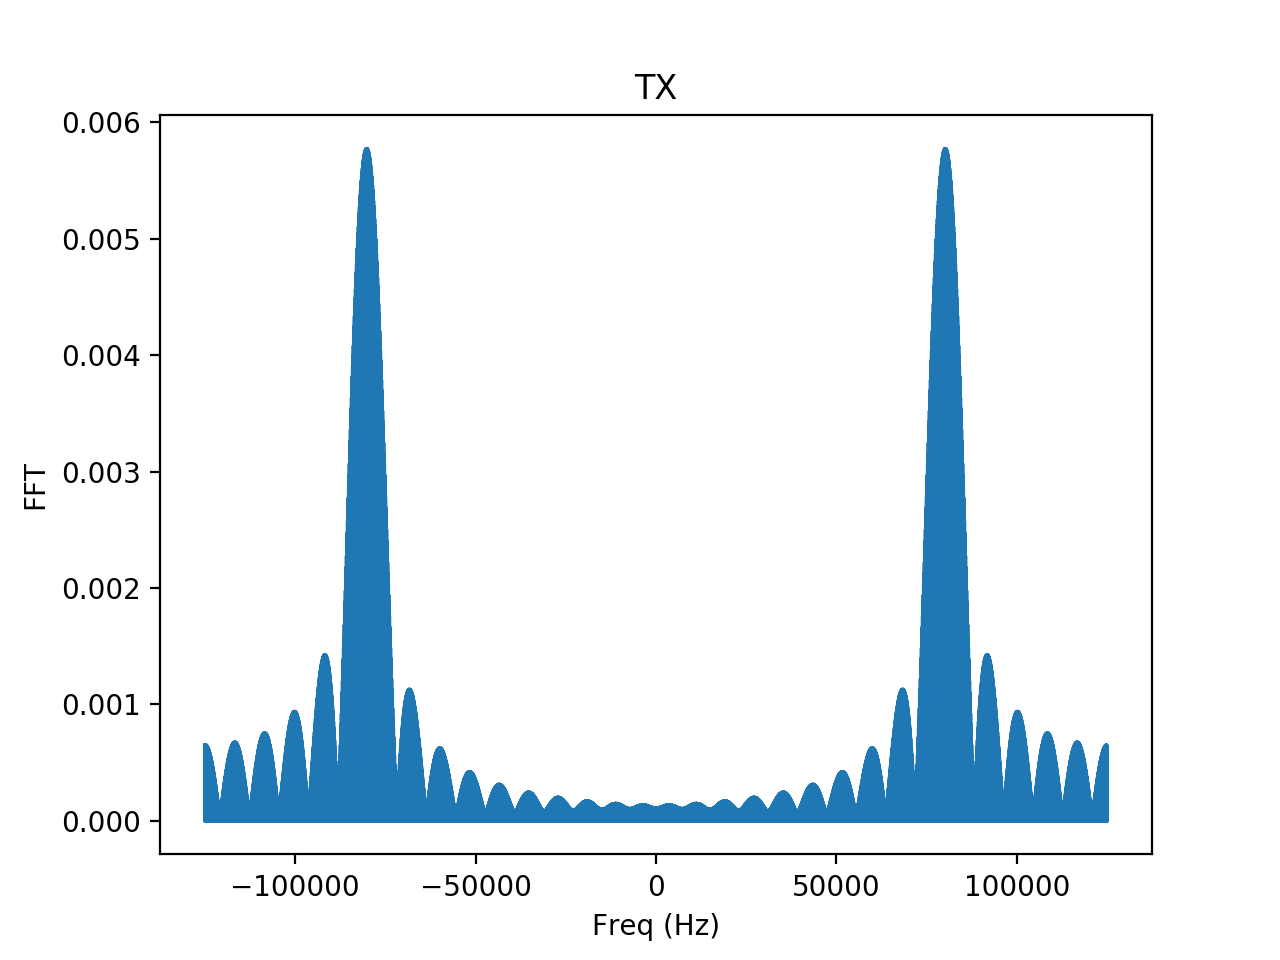

<IPython.core.display.Javascript object>


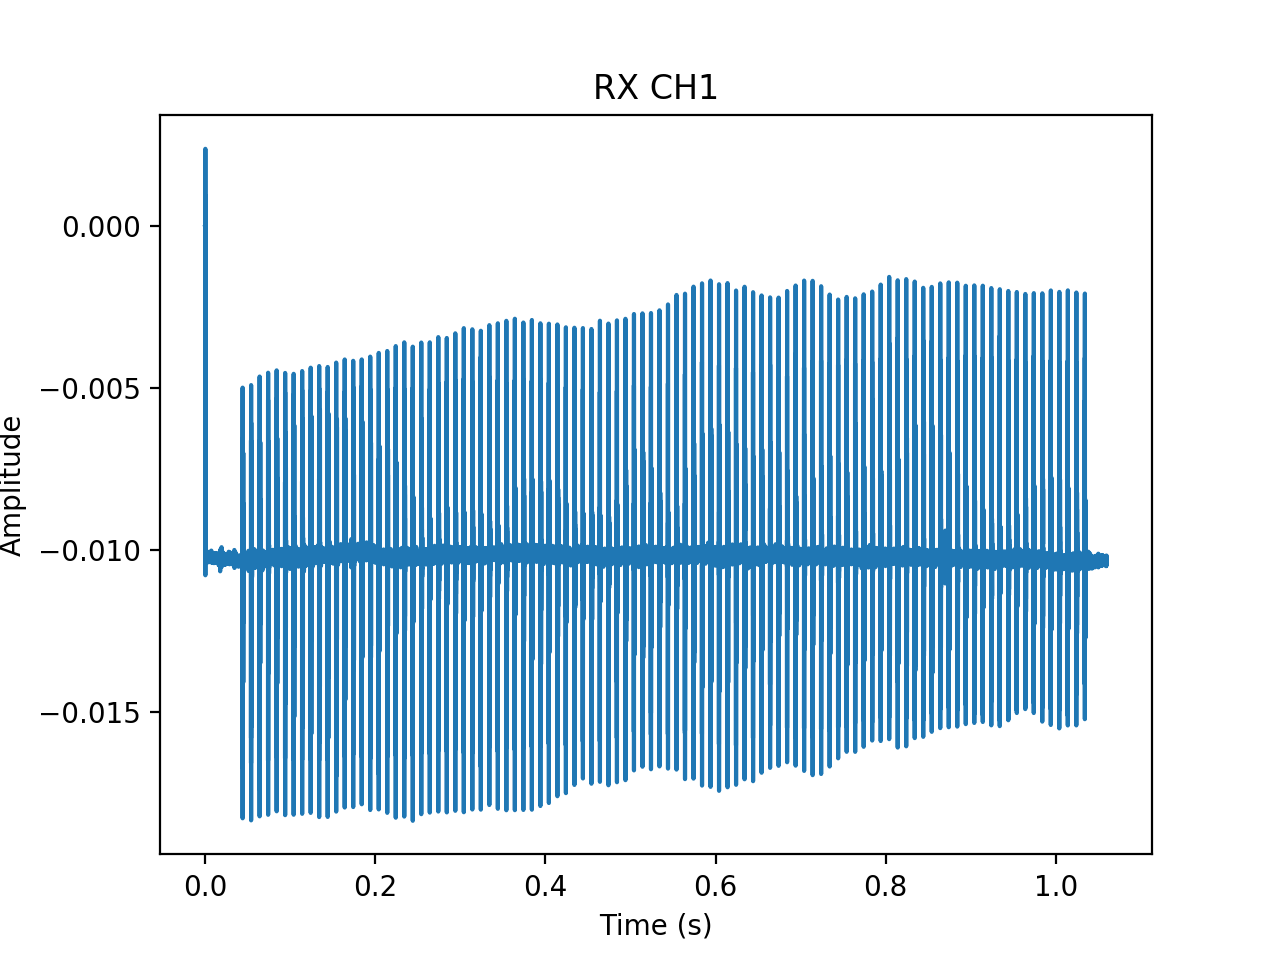

<IPython.core.display.Javascript object>


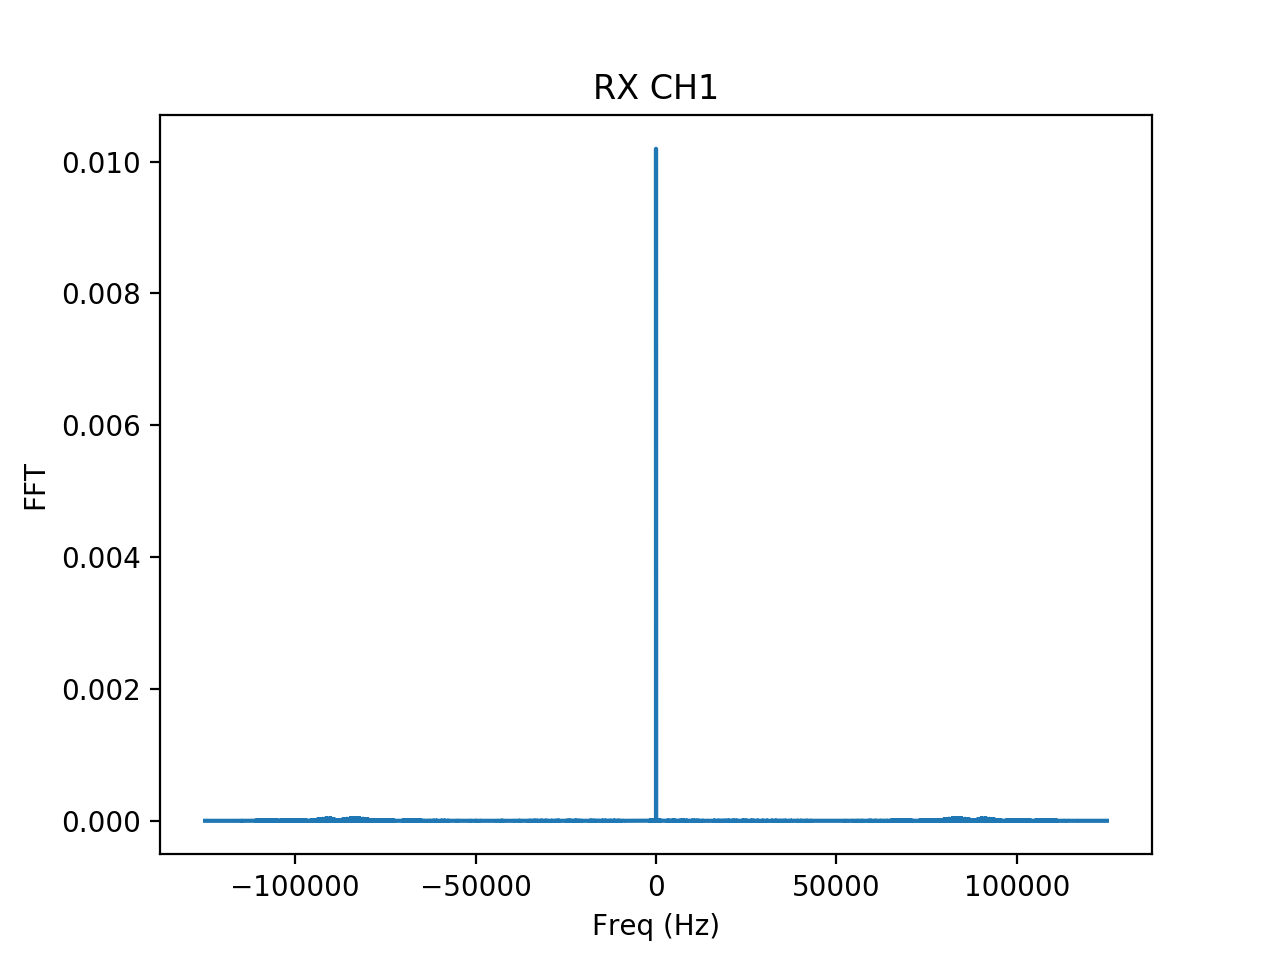

<IPython.core.display.Javascript object>


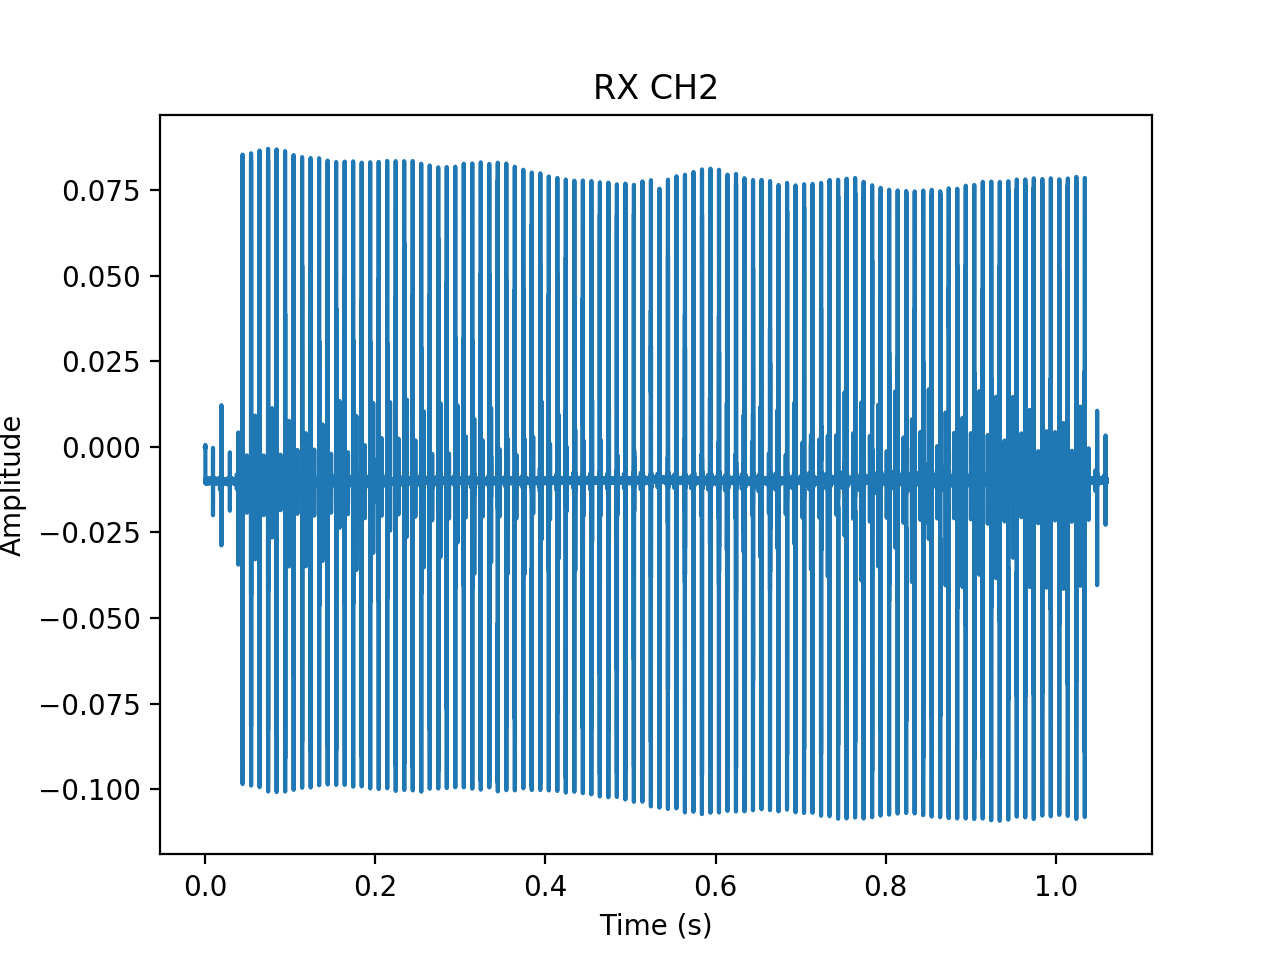

<IPython.core.display.Javascript object>


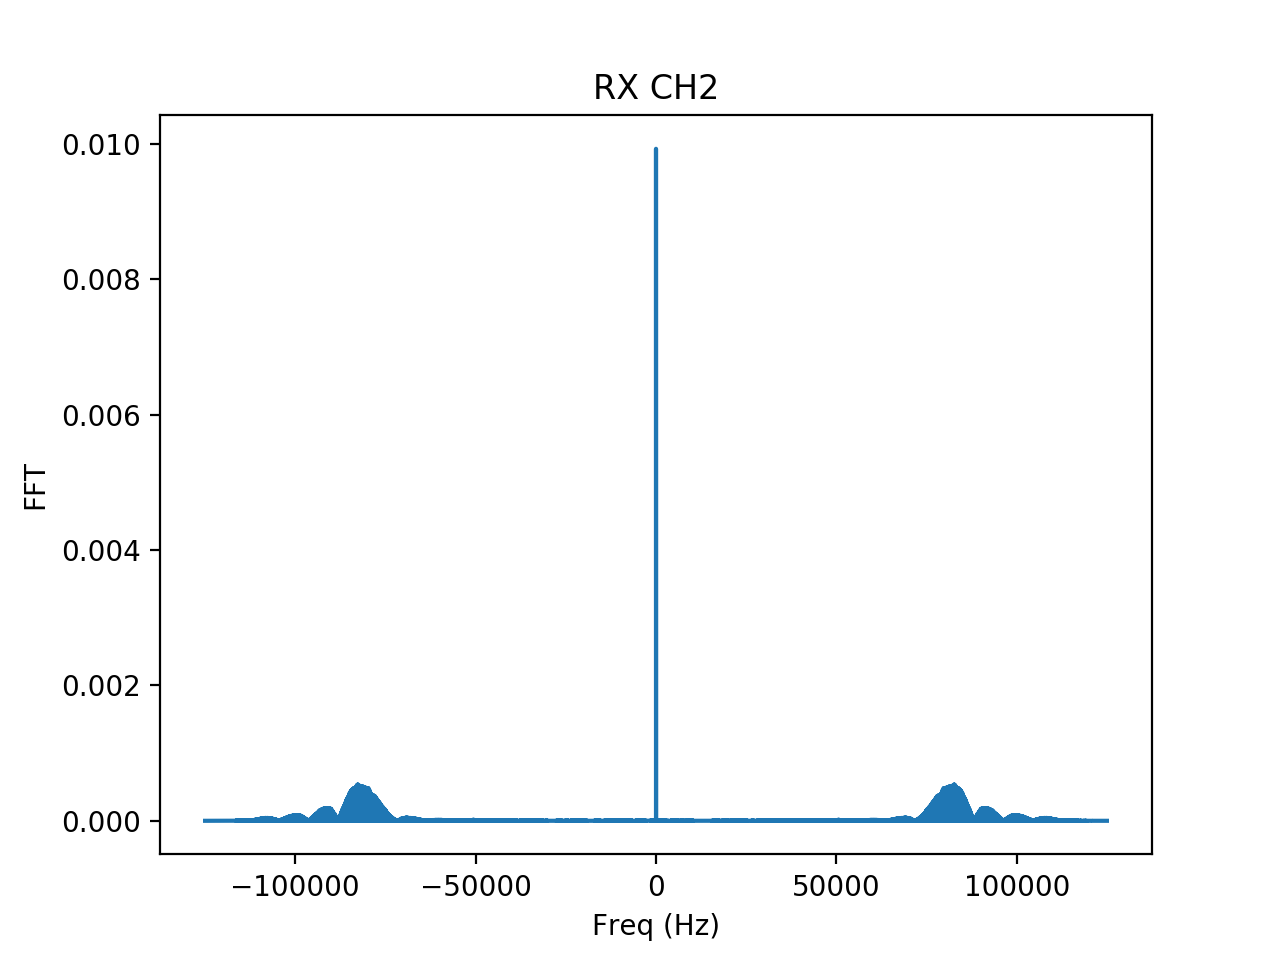

In [4]:
%matplotlib notebook
import matplotlib
# matplotlib.use('nbagg')

import mpld3
mpld3.enable_notebook()

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import sys
from dsp.tools import fft, high_pass
import glob

fs = 250000.
data_type = 'float32'


# day = 'day2'
# exp = '202'
# # signal_name_pattern = 'chirp*'
# # signal_name_pattern = '*double_chirp*'
# signal_name_pattern = '*f080000*'



tx_file = glob.glob(f'measurements/{day}/signals/{signal_name_pattern}')[0]
rx1_file = glob.glob(f'measurements/{day}/exp{exp}*/*[0-9]_{signal_name_pattern}')[0]
rx2_file = glob.glob(f'measurements/{day}/exp{exp}*/*[0-9]_{signal_name_pattern}')[1]

sigs = (tx_file, rx1_file, rx2_file)
titles = ('TX', 'RX CH1', 'RX CH2')

for i, sig in enumerate(sigs):
    with open(sig, 'rb') as f:
        data = np.fromfile(f, dtype=data_type)
        data_freqs, data_fft = fft(data, fs)
    
    N = len(data)
    t = np.arange(N)/fs

    # Time domain
    plt.figure()
    plt.plot(t, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(titles[i])

    # FFT
    plt.figure()
    plt.plot(data_freqs, data_fft)
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT')
    plt.title(titles[i])



plt.show()
